# Assigment 1 report: Graph Pathfinding with Genetic Algorithms
     
          
              
Favstina Krečič, Lea Križaj

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

kako sm si jaz zamislila: za vsak task je kratek opis taska, potem opis funkcij, parametrov, spremenljivk - ta pomembne reči, potem pa še sekcija z rezultati

## Task 1: Shortest path between 2 nodes

In the first task, our goal was to find the shortest path between two nodes in a directed graph. Firstly, we had to define some graphs, which we wrote by hand and saved as .txt files in folder 'graphs'. Each row defines two nodes and a weight of an edge between them. 

**Our proposed genoms:**    
Our gene space consists of all graph nodes except the start and end nodes, plus the value 0. This allows the GA to generate different sequences of nodes that represent a potential path. Each candidate solution is then passed to the fitness function pathLength, where it is preprocessed. During preprocessing, all zeros are removed (here zeros represent “no move,” equally to genom being one gene shorter, which allows us to simulate shorter paths), and all duplicate nodes are eliminated except for their first occurrence. The resulting sequence, path_real, is therefore a cleaned path that contains only graph nodes, with no duplicates, and with variable length.

### Functions:      
**read_graph(path)** is an additional function that accepts a path to .txt file, so a path to a graph and it prints the number of nodes **n** and a **graph** itself, and return those two. We use this same function in all 3 tasks in this assignment.     

**pathLength** - our fitness function. As mentioned before, the sequence it receives is first preprocessed, producing **path_real**. We then iterate over this cleaned path and check whether every consecutive pair of nodes is connected in the graph. If the connection exists, its weight is added to the total distance. If any connection is missing, the path is considered invalid and is penalized by returning a large negative value. Finally, valid paths return their total distance (a negative value, since the GA can only maximize).

### Results:   
We than used our fitness function to find the shortest distance between selected **start** and **end** nodes in a chosen graph, using Genetic Algorithm in pygad library. We tested it using different implementation parameters:


1. first we tried our algorithm on graphs of diferent sizes and observed its returned minimal path depending on diferent number of performed generations. We tried it with small (n=6), medium (n=15) and large (n=?) sized graph.

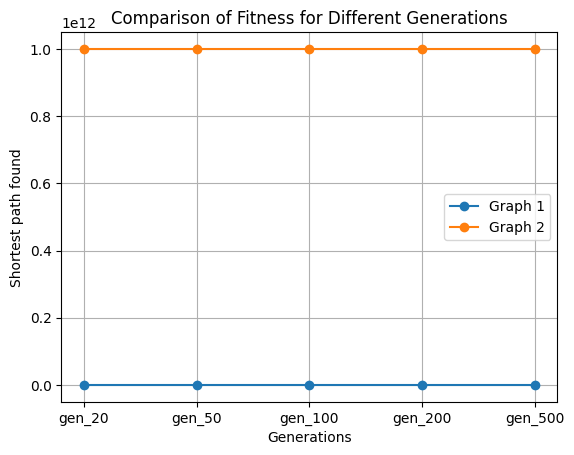

In [3]:
df = pd.read_csv("Task1/GenerationsResults.csv")

# transpose to get a function
df_transposed = df.T

for i, row in enumerate(df_transposed.columns):
    plt.plot(df_transposed.index, df_transposed[row], marker="o", label=f"Graph {i+1}")

plt.xlabel("Generations")
plt.ylabel("Shortest path found")
plt.title("Comparison of Fitness for Different Generations")
plt.grid(True)
plt.legend()

2.  We than repeated the same process, but for diferent starting population sizes

3. Different mutation probabilities (on medium sized graph).

4. we also tried different mutation and crossover operators.

## Task 2: Shortest path between multiple nodes  

In the second task we are again looking for the shortest path, but without the start and end nodes. We are given a **sequence of nodes**, a subset of our graph, which our path should visit in the order they are given, and minimize the lenght of this path.

**Proposed genoms:**    
This time, the gene space again consists of all graph nodes plus the value zero (in case of an empty sequence). Since the path may need to revisit certain nodes in order to reach all sequence nodes in the required order, duplicate nodes are allowed and no preprocessing is performed in the fitness function, unlike in Task 1. We ensured that every genome contains the required sequence by implementing custom crossover and mutation operators. 


### Functions:      

**pathLength** - The function is similar to the fitness function in Task 1, except that it now also handles duplicate nodes and checks whether a required sequence is followed. Since duplicate genes are allowed, there is no preprocessing; we simply skip a gene if it is the same as the previous one. We maintain a counter that tracks our current position within the target sequence, and this counter increases when the current node matches the next required node in the sequence. If the counter reaches the end of the sequence (equals its length), then the correct path has been found and we return the total distance. Otherwise, the path is penalized as in the first task.